# Unit 5 - Financial Planning

In [70]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import matplotlib.pyplot as plt


%matplotlib inline

In [37]:
# Load .env enviroment variables
load_dotenv(".env")  # or load_dotenv("path/to/your/.env")



True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [38]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [39]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [40]:
# Fetch current BTC price
btc_current_price_data = requests.get(btc_url).json()
print(json.dumps(btc_current_price_data, indent=4))


# Fetch current ETH price
eth_current_price_data = requests.get(eth_url).json()
print(json.dumps(eth_current_price_data, indent=4))

# Compute current value of my crpto
btc_current_price = btc_current_price_data['data']['1']['quotes']['USD']['price']
eth_current_price = eth_current_price_data['data']['1027']['quotes']['USD']['price']
my_btc_value = my_btc * btc_current_price
my_eth_value = my_eth * eth_current_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19334718,
            "total_supply": 19334718,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 28519.0,
                    "volume_24h": 9419967936,
                    "market_cap": 551548267484,
                    "percentage_change_1h": 0.18268130153823,
                    "percentage_change_24h": -0.200912732962384,
                    "percentage_change_7d": 3.06795212098873,
                    "percent_change_1h": 0.18268130153823,
                    "percent_change_24h": -0.200912732962384,
                    "percent_change_7d": 3.06795212098873
                }
            },
            "last_updated": 1680407978
        }
    },
    "metadata": {
        "timestamp": 1680407978,
        "num_crypto

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [41]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [42]:
# Load environment variables from the .env file
result = load_dotenv(".env")  # or load_dotenv("path/to/your/.env")

if result:
    print("Environment variables loaded successfully.")
else:
    print("Failed to load environment variables from the .env file.")

# Get the Alpaca API key and secret from environment variables
alpaca_key = os.getenv('APCA_API_KEY_ID')
alpaca_secret_key = os.getenv('APCA_API_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_key,
    alpaca_secret_key,
    api_version="v2"
)

# Check the type of the alpaca_key variable
print(type(alpaca_key))

Environment variables loaded successfully.
<class 'str'>


In [43]:
# Format current date as ISO format
today = pd.Timestamp('2022-11-9', tz='America/New_York').isoformat()
# Set the tickers
ticker = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = '1Day'

# Get current closing prices for SPY and AGG
stocks_and_bonds_port_df = alpaca.get_bars(
    ticker,
    timeframe,
    start=today,
    end=today
).df

stocks_and_bonds_port_df
# Reorganize the DataFrame
# Separate ticker data
AGG = stocks_and_bonds_port_df[stocks_and_bonds_port_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = stocks_and_bonds_port_df[stocks_and_bonds_port_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
stocks_and_bonds_port_df = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])
# Preview DataFrame
stocks_and_bonds_port_df.head()

AGG                                              \
                            open     high    low  close   volume trade_count   
timestamp                                                                      
2022-11-09 05:00:00+00:00  94.39  94.7001  94.25  94.55  6661375       27653   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2022-11-09 05:00:00+00:00  94.495474  379.93  381.14  373.61  374.13   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2022-11-09 05:00:00+00:00  77996412      589795  377.164224

In [44]:
# Pick AGG and SPY close prices
agg_close_price = float(stocks_and_bonds_port_df['AGG']['close'])
spy_close_price = float(stocks_and_bonds_port_df['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $94.55
Current SPY closing price: $374.13


In [45]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18706.50
The current value of your 200 AGG shares is $18910.00


### Savings Health Analysis

In [46]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
shares = my_agg_value + my_spy_value
crypto = my_btc_value + my_eth_value

# Setting tickers
ticker = ['shares','crypto']

# Create savings DataFrame
savings_data = {
    "amount":[shares, crypto]
}
df_savings = pd.DataFrame(savings_data,index=ticker)
# Display savings DataFrame
display(df_savings)

,amount
shares,37616.500
crypto,43866.733


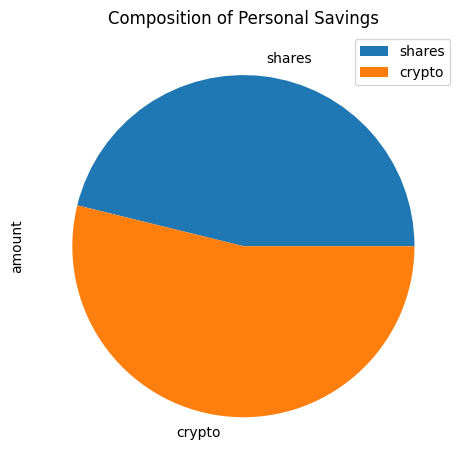

In [88]:
# Plot savings pie chart
df_savings.plot.pie(title={'Composition of Personal Savings'}, ylabel='amount',subplots=True)

plt.tight_layout()

# Save the pie plot as a PNG file
plt.savefig('../Images/df_savings.png')

# Show the plot in a window (optional)
plt.show()


In [74]:
# Save the pie chart as a PNG file
plt.savefig('..\Images\savings_pie_chart.png')

<Figure size 640x480 with 0 Axes>

In [48]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = shares + crypto
# Validate saving health
# Settign up my IF statements
if total_savings > emergency_fund:
    print(f"Congrats! you are almost rich!!")
if total_savings == emergency_fund:
    print(f"Eh. You are about to be Ballin. Keep working.")
if total_savings < emergency_fund:
    print(f"Bro you are ${emergency_fund - total_savings} away from being a Baby Baller!")

Congrats! you are almost rich!!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [49]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-11-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-11-09', tz='America/New_York').isoformat()
# Setting timeframe
timeframe='1Day'

In [50]:
# Get 5 years' worth of historical data for SPY and AGG
# Setting tickers
tickers = ['AGG','SPY']

# Creating DataFrame
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol',axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol',axis=1)
# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])
# Display sample data
df_stock_data.head()

AGG                                    \
                             open    high     low    close   volume   
timestamp                                                             
2017-11-09 05:00:00+00:00  109.39  109.46  109.30  109.430  2479826   
2017-11-10 05:00:00+00:00  109.06  109.15  108.97  108.990  1751136   
2017-11-13 05:00:00+00:00  109.11  109.11  108.96  108.990  1891563   
2017-11-14 05:00:00+00:00  109.01  109.12  109.00  109.100  2799967   
2017-11-15 05:00:00+00:00  109.26  109.38  109.14  109.335  2496168   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2017-11-09 05:00:00+00:00       10095  109.404273  257.73  258.3900  256.36   
2017-11-10 05:00:00+00:00        7642  109.034170  257.73  258.2926  257.37   
2017-11-13 05:00:00+00:00        8098  109.021309  257.30  258.5900  257.27   
2017-11-14 05:00:00+00:00       11233  109.088460  257.41  257.8500  256.52   
2017-11-15 05:00:00+00:00        8706  109.273074  256.62  257.2200  255.63   

                                                                       
                              close    volume trade_count        vwap  
timestamp                                                              
2017-11-09 05:00:00+00:00  258.1908  95115637      349621  257.756200  
2017-11-10 05:00:00+00:00  258.1000  59984662      176651  257.956079  
2017-11-13 05:00:00+00:00  258.3400  51392695      149087  258.137686  
2017-11-14 05:00:00+00:00  257.7500  61739527      204505  257.563860  
2017-11-15 05:00:00+00:00  256.4200  81516581      257052  256.625509

In [51]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_60_40_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [52]:
# Printing the simulation input data
MC_60_40_dist.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
timestamp                                                             
2017-11-09 05:00:00+00:00  109.39  109.46  109.30  109.430  2479826   
2017-11-10 05:00:00+00:00  109.06  109.15  108.97  108.990  1751136   
2017-11-13 05:00:00+00:00  109.11  109.11  108.96  108.990  1891563   
2017-11-14 05:00:00+00:00  109.01  109.12  109.00  109.100  2799967   
2017-11-15 05:00:00+00:00  109.26  109.38  109.14  109.335  2496168   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-11-09 05:00:00+00:00       10095  109.404273          NaN  257.73   
2017-11-10 05:00:00+00:00        7642  109.034170    -0.004021  257.73   
2017-11-13 05:00:00+00:00        8098  109.021309     0.000000  257.30   
2017-11-14 05:00:00+00:00       11233  109.088460     0.001009  257.41   
2017-11-15 05:00:00+00:00        8706  109.273074     0.002154  256.62   

                                                                             \
                               high     low     close    volume trade_count   
timestamp                                                                     
2017-11-09 05:00:00+00:00  258.3900  256.36  258.1908  95115637      349621   
2017-11-10 05:00:00+00:00  258.2926  257.37  258.1000  59984662      176651   
2017-11-13 05:00:00+00:00  258.5900  257.27  258.3400  51392695      149087   
2017-11-14 05:00:00+00:00  257.8500  256.52  257.7500  61739527      204505   
2017-11-15 05:00:00+00:00  257.2200  255.63  256.4200  81516581      257052   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-11-09 05:00:00+00:00  257.756200          NaN  
2017-11-10 05:00:00+00:00  257.956079    -0.000352  
2017-11-13 05:00:00+00:00  258.137686     0.000930  
2017-11-14 05:00:00+00:00  257.563860    -0.002284  
2017-11-15 05:00:00+00:00  256.625509    -0.005160

In [53]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_60_40_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 110.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 120.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 130.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 140.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 150.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 160.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 170.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 180.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 190.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 200.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 210.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 220.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 230.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 240.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 250.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 260.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 270.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 280.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 290.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 300.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 310.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 320.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 330.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 340.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 350.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 360.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 370.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 380.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 390.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 400.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 410.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 420.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 430.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 440.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 450.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 460.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 470.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 480.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 490.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998251,0.992080,1.014024,0.993779,0.994733,1.012323,0.997202,0.998604,0.995534,0.997554,...,1.005868,1.003636,1.005892,0.988399,1.008764,1.001325,1.000268,1.022834,0.997027,1.001703
2,0.985977,0.993163,1.022849,0.980341,0.998440,1.018122,1.011847,0.987273,0.987822,1.009039,...,0.994225,1.004769,1.012706,0.988290,0.995372,0.997542,1.004759,1.000727,1.002087,1.016239
3,0.990394,0.998089,1.012285,0.986523,1.011846,1.020917,1.001548,0.972507,0.992069,1.017877,...,1.000424,0.995407,1.003669,1.000037,0.996415,1.009828,1.016292,0.993704,0.989391,0.998120
4,0.991488,1.008327,1.016600,0.986709,1.010760,1.017795,0.996811,0.968388,1.002538,1.017193,...,1.001847,1.006522,0.998811,1.011393,0.995259,1.008154,1.016958,1.005951,0.984970,1.004539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.460097,6.775065,8.415160,5.761592,4.300497,1.651985,2.587389,3.050861,1.662065,1.865461,...,3.153928,3.882071,13.034735,1.241450,2.963606,4.798991,2.200629,5.090185,2.018227,10.338311
7557,6.410662,6.827069,8.373589,5.759559,4.305466,1.628291,2.567201,3.050620,1.656841,1.868847,...,3.171022,3.918023,13.067860,1.217110,2.942658,4.822376,2.233131,5.011757,2.015803,10.344079
7558,6.416348,6.885156,8.349830,5.713208,4.288368,1.629968,2.572922,3.073462,1.648923,1.874142,...,3.155870,3.904404,13.115066,1.242821,2.964034,4.843767,2.249032,4.979906,2.035128,10.306861
7559,6.497785,6.862390,8.343126,5.734648,4.287081,1.622405,2.576794,3.036695,1.652513,1.885855,...,3.113354,3.900984,13.217748,1.244374,2.954267,4.821335,2.243057,4.976242,2.033658,10.124801


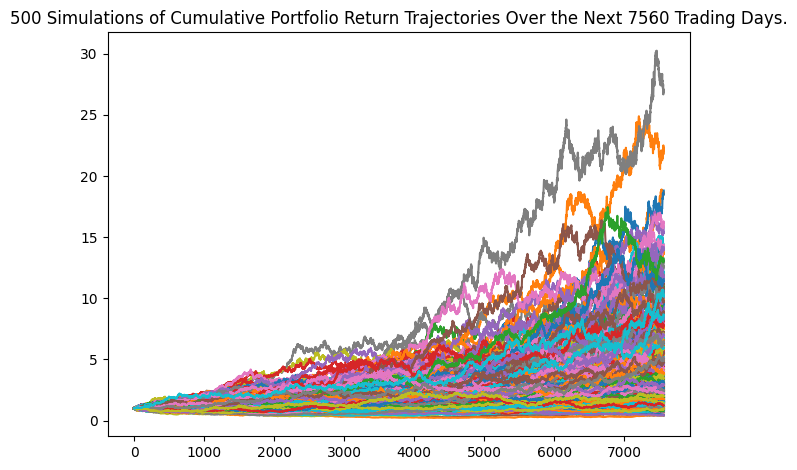

In [78]:
# Plot simulation outcomes
line_plot = MC_60_40_dist.plot_simulation()

plt.tight_layout()

# Save the line plot as a PNG file
plt.savefig('../Images/simulation_line_plot.png')

# Show the plot in a window (optional)
plt.show()


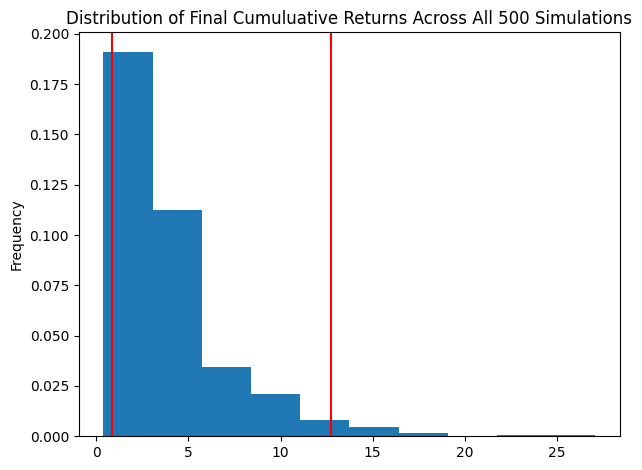

In [79]:
# Plot probability distribution and confidence intervals
MC_60_40_dist.plot_distribution()

plt.tight_layout()

# Save the line plot as a PNG file
plt.savefig('../Images/distribution_500_bar.png')

# Show the plot in a window (optional)
plt.show()


### Retirement Analysis

In [56]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_60_40_dist.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              4.020457
std               3.263862
min               0.398217
25%               1.897653
50%               3.009348
75%               4.821182
max              27.069419
95% CI Lower      0.876095
95% CI Upper     12.742260
Name: 7560, dtype: float64


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:168: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [57]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $17521.9 and $254845.19


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [58]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $26282.85 and $382267.79


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [59]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_early_5_year_retirement = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [60]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_early_5_year_retirement.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 110.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 120.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 130.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 140.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 150.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 160.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 170.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 180.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 190.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 200.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 210.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 220.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 230.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 240.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 250.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 260.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 270.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 280.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 290.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 300.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 310.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 320.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 330.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 340.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 350.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 360.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 370.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 380.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 390.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 400.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 410.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 420.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 430.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 440.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 450.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 460.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 470.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 480.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 490.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004920,1.002311,0.989799,1.006546,0.993877,1.000424,0.994196,1.001953,1.002649,1.009451,...,0.995678,0.990352,0.982437,0.995773,0.994029,0.992398,1.001791,1.005985,0.991869,0.995188
2,0.998435,0.994948,0.993964,1.021706,0.995221,1.012613,0.999203,1.004423,0.996423,1.012276,...,0.995011,0.989926,0.992117,1.002286,0.998851,0.997849,1.018265,0.998692,0.981411,0.980123
3,0.998477,0.989021,0.998620,1.013398,0.996988,1.019303,1.004946,1.005434,1.000193,1.022229,...,1.003579,0.980508,0.987454,1.021675,1.003037,0.997585,1.020812,0.998231,0.971666,0.978053
4,1.000171,0.989641,0.998769,1.005936,0.998278,1.011819,1.008566,1.013089,1.006983,1.027547,...,0.985416,0.984637,0.991206,1.017728,0.997195,0.990697,1.020636,0.995666,0.966729,0.971324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.508535,1.550846,0.763562,1.321678,1.420063,1.150956,1.322984,0.946687,1.691661,1.433764,...,0.954749,1.259752,1.081211,1.186492,1.533034,2.024771,1.342401,1.482751,1.229675,1.036904
1257,1.505405,1.535804,0.758726,1.327564,1.421184,1.148935,1.332081,0.942308,1.687356,1.427531,...,0.955823,1.256914,1.094136,1.204710,1.518767,2.026918,1.349738,1.489702,1.213096,1.043856
1258,1.521200,1.547180,0.752836,1.310861,1.405613,1.147054,1.330778,0.947065,1.694056,1.407941,...,0.950551,1.260615,1.107490,1.204002,1.524158,2.027886,1.342162,1.493093,1.219629,1.044634
1259,1.532149,1.550897,0.757877,1.302481,1.428348,1.154332,1.298551,0.942923,1.676420,1.410390,...,0.944940,1.253652,1.120447,1.209250,1.515926,2.017928,1.339118,1.513594,1.226506,1.049415


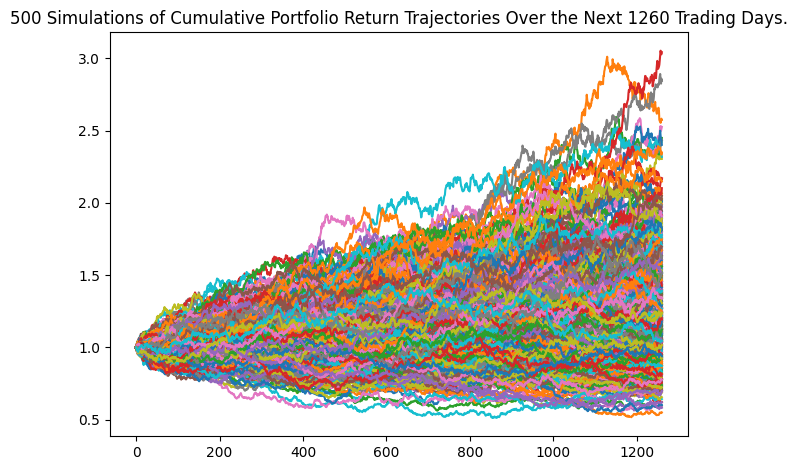

In [81]:
# Plot simulation outcomes
line_plot = MC_early_5_year_retirement.plot_simulation()

plt.tight_layout()

# Save the line plot as a PNG file
plt.savefig('../Images/simulation_1260.png')

# Show the plot in a window (optional)
plt.show()


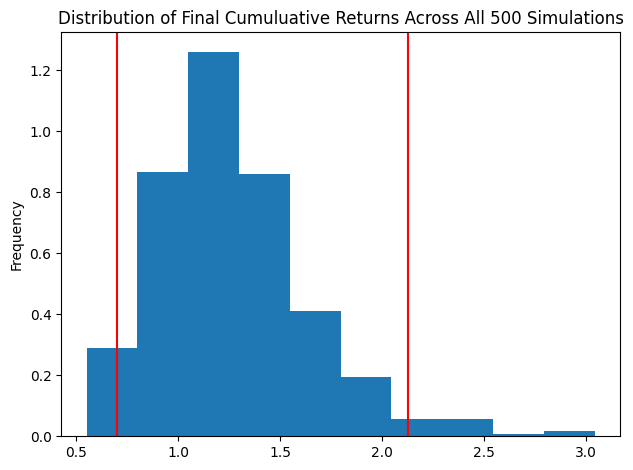

In [82]:
# Plot probability distribution and confidence intervals
MC_early_5_year_retirement.plot_distribution()

plt.tight_layout()

# Save the bar plot as a PNG file
plt.savefig('../Images/final_cum_ret_500.png')

# Show the plot in a window (optional)
plt.show()


In [63]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5 = MC_early_5_year_retirement.summarize_cumulative_return()

# Print summary statistics
print(tbl)


count           500.000000
mean              4.020457
std               3.263862
min               0.398217
25%               1.897653
50%               3.009348
75%               4.821182
max              27.069419
95% CI Lower      0.876095
95% CI Upper     12.742260
Name: 7560, dtype: float64


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:168: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [64]:
# Set initial investment
MC_5year_early_initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5[8]*60000,2)
ci_upper_five = round(tbl_5[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $41984.58 and $127536.73


### Ten Years Retirement Option

In [65]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_early_10_year_retirement = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [83]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_early_10_year_retirement.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 110.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 120.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 130.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 140.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 150.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 160.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 170.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 180.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 190.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 200.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 210.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 220.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 230.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 240.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 250.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 260.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 270.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 280.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 290.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 300.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 310.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 320.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 330.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 340.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 350.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 360.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 370.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 380.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 390.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 400.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 410.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 420.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 430.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 440.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 450.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 460.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 470.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 480.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 490.


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.p

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997934,1.007931,0.996983,1.003097,1.000706,0.994483,0.998359,0.996617,1.002755,0.994642,...,1.003621,1.007200,1.001948,0.987796,1.005109,1.009756,1.011520,1.003705,1.010970,0.994436
2,0.997729,1.006915,1.004953,1.002919,1.002040,0.997885,0.993102,1.001866,1.003231,0.991790,...,1.017364,1.004292,1.013773,1.003038,1.014011,0.999316,1.024937,1.000524,1.012106,0.994867
3,0.987238,1.017315,1.003061,0.991899,1.002909,0.998017,1.002864,0.996179,1.014401,0.973537,...,0.991277,0.990952,1.019790,1.012656,0.994616,0.994821,1.014356,0.992152,0.996922,1.010387
4,0.968821,1.013213,0.997603,0.989981,0.992145,0.999499,1.006611,0.995868,1.000989,0.964621,...,0.998967,0.992687,1.029846,1.008088,0.987485,0.989427,1.004047,0.987375,0.989226,1.025114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.351152,1.115483,1.036423,0.935679,1.260449,1.311270,1.689145,2.934181,1.703161,0.505247,...,1.211393,1.930392,1.561352,1.759198,1.267860,1.621469,1.908803,1.282404,1.093706,1.775946
2517,1.339503,1.119347,1.038749,0.927821,1.256007,1.318206,1.695243,2.930433,1.702857,0.509034,...,1.206984,1.937474,1.553248,1.768957,1.259524,1.626061,1.934518,1.295665,1.095098,1.771680
2518,1.357894,1.123103,1.046144,0.923498,1.258106,1.318472,1.671010,2.950817,1.681836,0.508067,...,1.202519,1.941133,1.569269,1.788232,1.250270,1.616673,1.914092,1.290532,1.089563,1.772625
2519,1.357325,1.116064,1.051585,0.926932,1.265969,1.318418,1.668645,2.960724,1.709720,0.511581,...,1.201327,1.938522,1.553110,1.795246,1.238084,1.603746,1.924961,1.293133,1.082151,1.777602


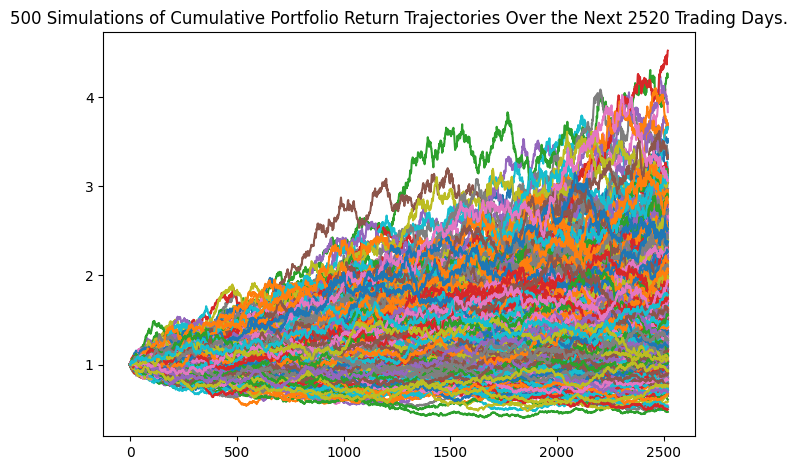

In [84]:
# Plot simulation outcomes
MC_early_10_year_retirement.plot_simulation()

plt.tight_layout()

# Save the line plot as a PNG file
plt.savefig('../Images/MC_early_10_year_retirement.png')

# Show the plot in a window (optional)
plt.show()

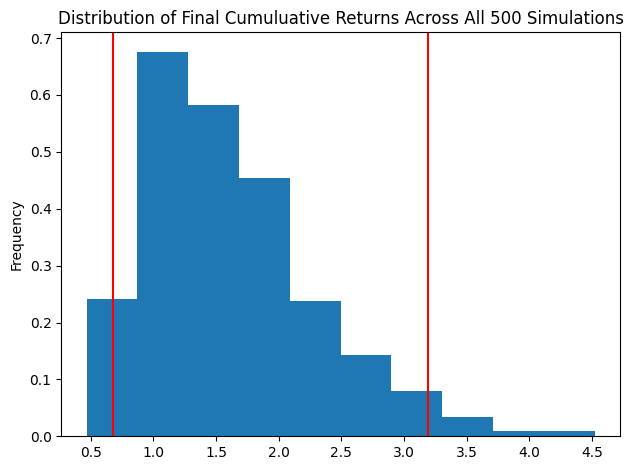

In [85]:
# Plot probability distribution and confidence intervals
MC_early_10_year_retirement.plot_distribution()

plt.tight_layout()

# Save the bar plot as a PNG file
plt.savefig('../Images/MC_early_10_year_retirement_bar.png')

# Show the plot in a window (optional)
plt.show()

In [86]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10 = MC_early_10_year_retirement.summarize_cumulative_return()
# Print summary statistics
print(tbl_10)

count           500.000000
mean              1.622986
std               0.682075
min               0.468865
25%               1.124641
50%               1.481916
75%               1.954666
max               4.520503
95% CI Lower      0.677765
95% CI Upper      3.194522
Name: 2520, dtype: float64


c:\Users\marcl\Marcleipold Drive\Bootcamp\Module-5-Challenge---APIs\Starter_Code\MCForecastTools.py:168: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [87]:
# Set initial investment
MC_10year_early_initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10[8]*60000,2)
ci_upper_ten = round(tbl_10[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $40665.91 and $191671.3
